In [1]:
#Install Libraries
!pip install numpy matplotlib opencv-python seaborn pandas tqdm RandomWords

In [2]:
#import libraries
from collections import Counter
from pprint import pprint
import random
from time import time
import os
from glob import glob


import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm.notebook import trange, tqdm_notebook
import matplotlib as mpl

#to generate a random word
from random_words import RandomWords as randword
import random

In [3]:
#setup matplotlib settings
%matplotlib inline

#change size of shown pyplot images
mpl.rcParams['figure.figsize'] = (24, 24)

# Prelim analysis

In [4]:
rootDir = os.path.abspath('./by_merge/by_merge')
print(rootDir)

C:\Users\Kairos\Documents\BrailleThing\by_merge\by_merge


In [5]:
#what should be outputted
!dir "./by_merge/by_merge"

 Volume in drive C is OS
 Volume Serial Number is 3471-BD8C

 Directory of C:\Users\Kairos\Documents\BrailleThing\by_merge\by_merge

08/23/2016  09:43 PM    <DIR>          .
08/23/2016  09:43 PM    <DIR>          ..
10/04/2016  12:09 PM    <DIR>          30
10/04/2016  12:12 PM    <DIR>          31
10/04/2016  12:15 PM    <DIR>          32
10/04/2016  12:18 PM    <DIR>          33
10/04/2016  12:21 PM    <DIR>          34
10/04/2016  12:24 PM    <DIR>          35
10/04/2016  12:27 PM    <DIR>          36
10/04/2016  12:30 PM    <DIR>          37
10/04/2016  12:33 PM    <DIR>          38
10/04/2016  12:36 PM    <DIR>          39
10/04/2016  12:37 PM    <DIR>          41
10/04/2016  12:37 PM    <DIR>          42
10/04/2016  12:39 PM    <DIR>          43_63
10/04/2016  12:39 PM    <DIR>          44
10/04/2016  12:39 PM    <DIR>          45
10/04/2016  12:40 PM    <DIR>          46
10/04/2016  12:40 PM    <DIR>          47
10/04/2016  12:41 PM    <DIR>          48
10/04/2016  12:42 PM    <

In [6]:
#the god hacker way:
#asciiCodes = [d[len(rootDir) + 1:] for d in glob.glob(f'{rootDir}/*', recursive = True)]

#the normal way, get all ascii codes in datasets
asciiCodes = []
for i in glob(f'{rootDir}/*', recursive = True):
    asciiCodes += [i[len(rootDir) + 1:]]

print(asciiCodes)

['30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '41', '42', '43_63', '44', '45', '46', '47', '48', '49_69', '4a_6a', '4b_6b', '4c_6c', '4d_6d', '4e', '4f_6f', '50_70', '51', '52', '53_73', '54', '55_75', '56_76', '57_77', '58_78', '59_79', '5a_7a', '61', '62', '64', '65', '66', '67', '68', '6e', '71', '72', '74']


In [7]:
#get random ascii code from list of possible ascii codes
testAscii = random.choice(asciiCodes)

#convert from hex to a character, http://www.asciitable.com/ for reference
targetChar = chr(int(testAscii[:2], base = 16))
print(f'Target Character: "{targetChar}"')

#print the target character and amount of datapoints for that character
imageFiles = glob(f'{rootDir}/{testAscii}/**/*.png', recursive = True)
print(f'Number of Images: {len(imageFiles)}')

Target Character: "J"
Number of Images: 6601


(128, 128)


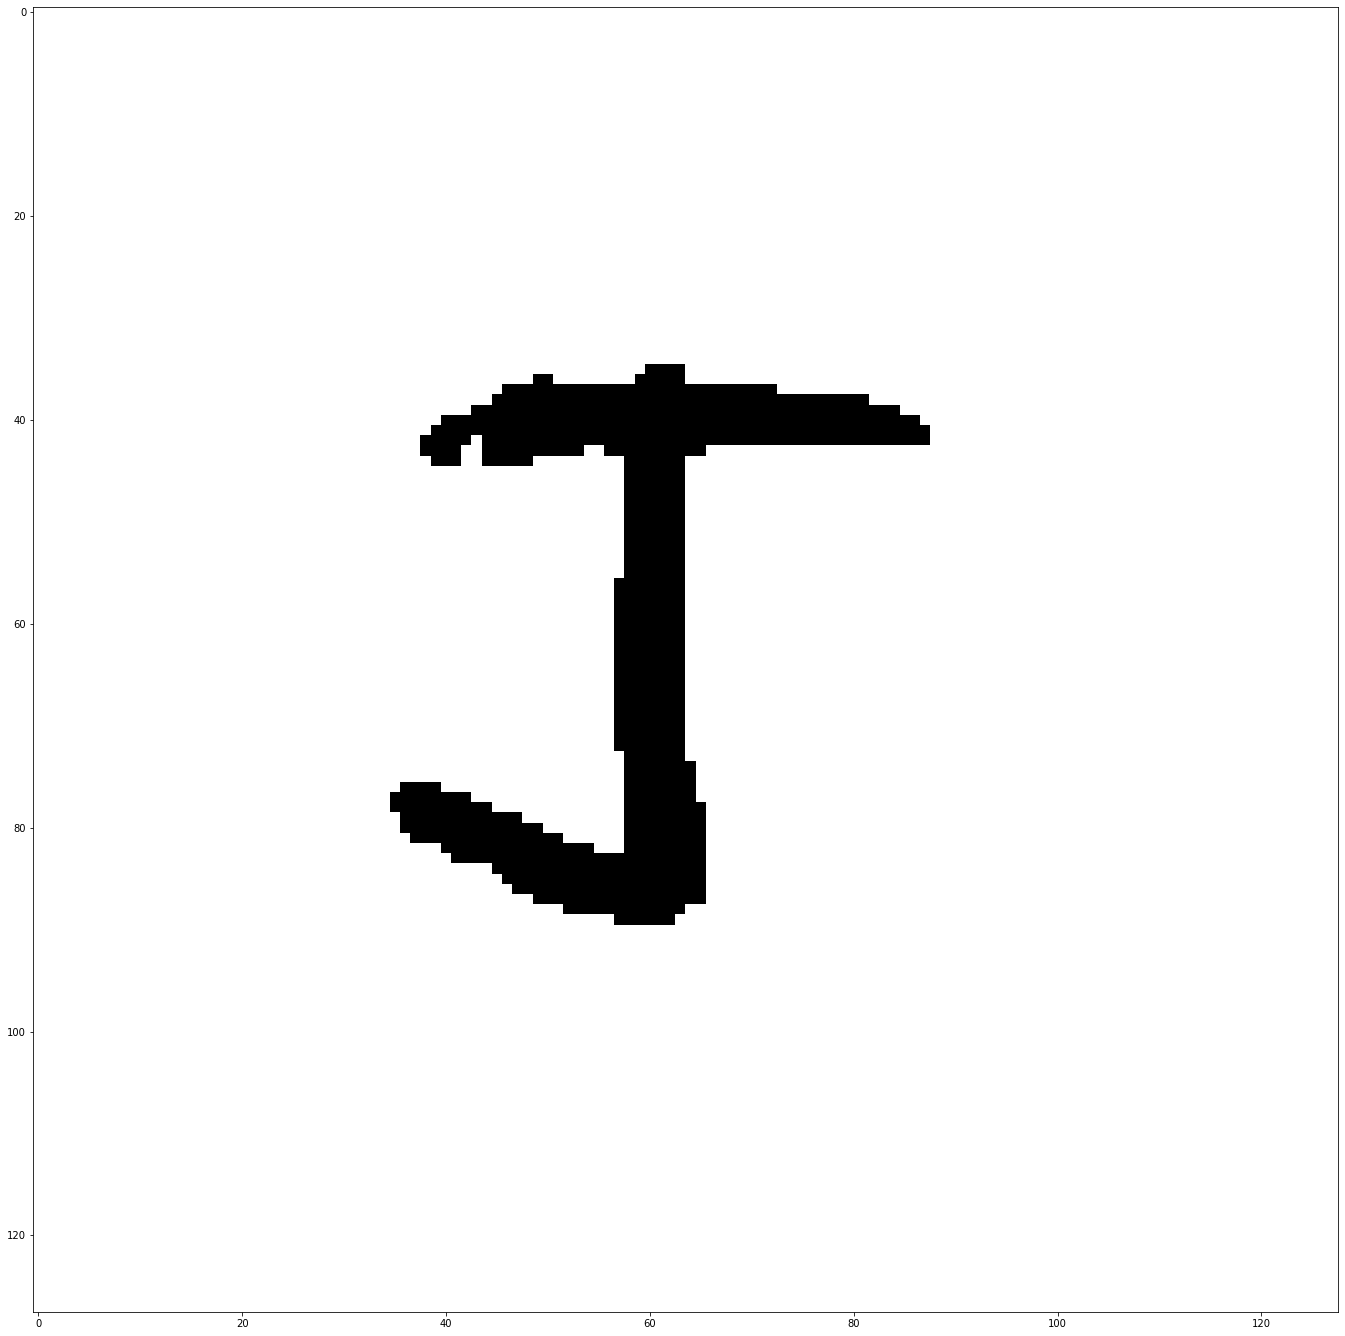

In [8]:
#get path of a random image and then put it in a opencv file
randomImagePath = random.choice(imageFiles)
img = cv.imread(randomImagePath, cv.IMREAD_GRAYSCALE)

#conver image to grayscale from bgr(not rgb)
print(img.shape)
plt.imshow(img, cmap = 'gray')

Shape of cropped Image: (55, 53)


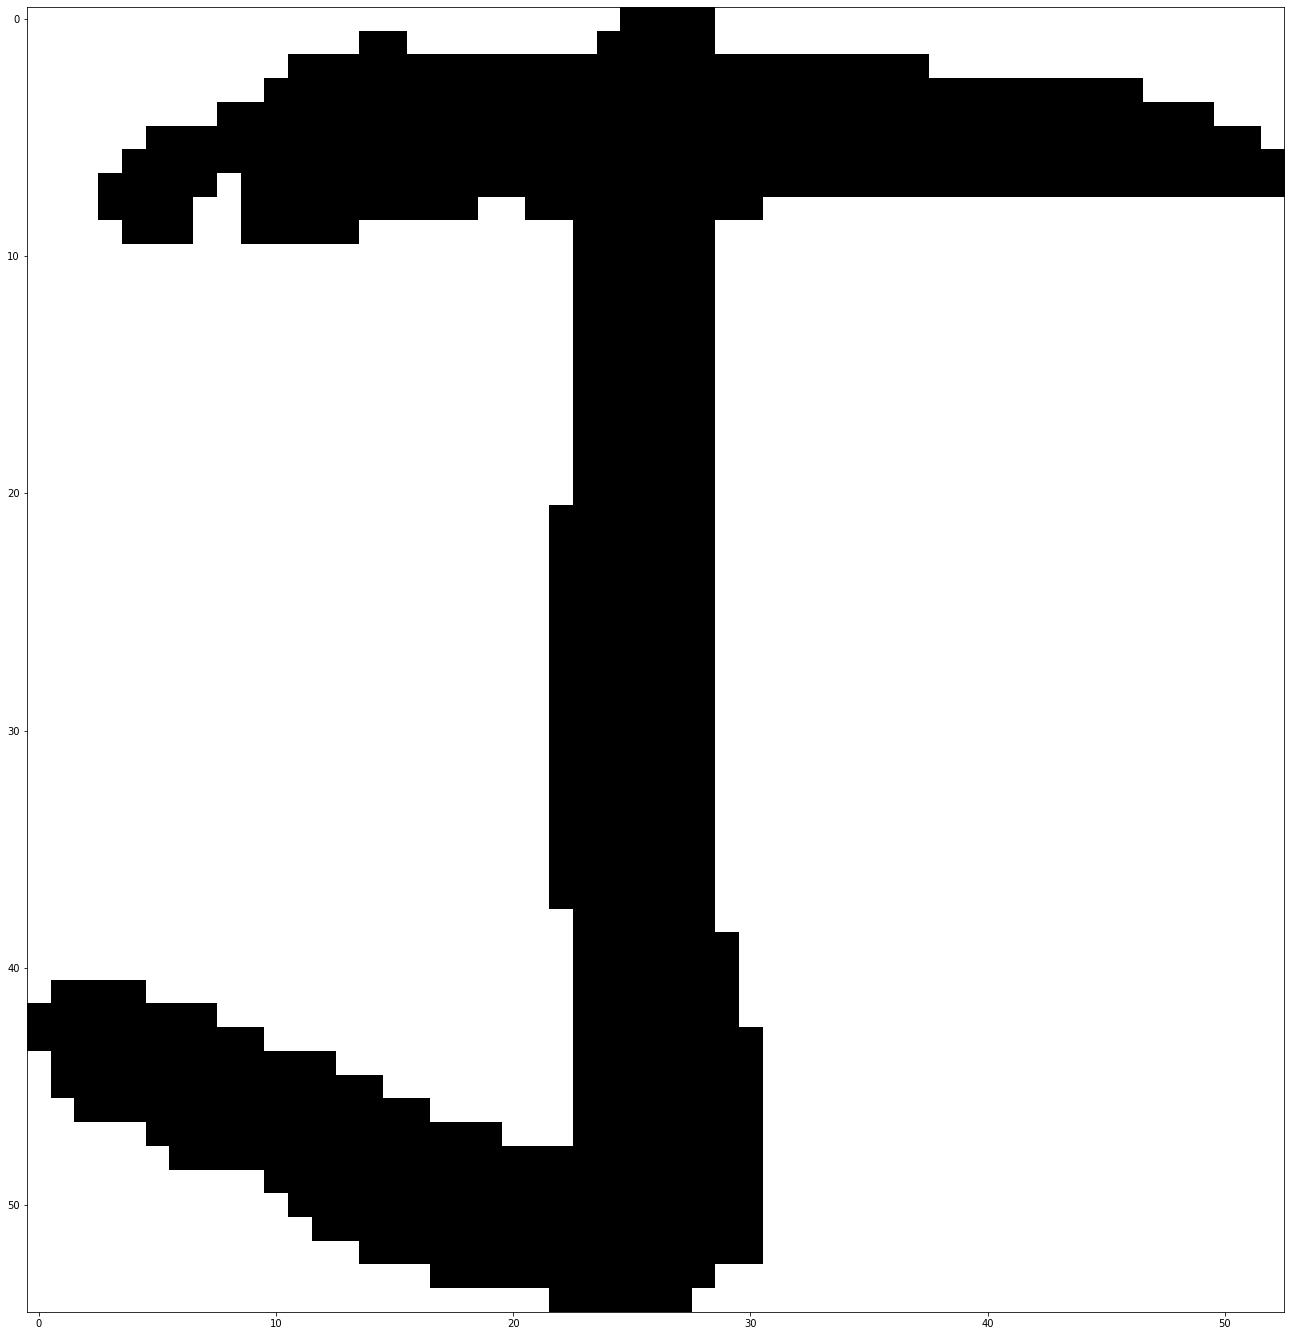

In [9]:
#get all pixels where the color value is less than 127(0 is black)
idy, idx = np.nonzero(img < 127)

#figure out the bounds of the x and y coords
miny, maxy, minx, maxx = np.min(idy), np.max(idy), np.min(idx), np.max(idx)

#crop the image to the bounds, max is + 
imgCropped = img[miny:maxy+1, minx:maxx+1]
plt.imshow(imgCropped, cmap = 'gray')
print('Shape of cropped Image:', imgCropped.shape)

In [10]:
#Define functions to crop in the x and y directions as well as normally

def crop(image):
    idy, idx = np.nonzero(image < 127)

    #figure out the bounds of the x and y coords
    miny, maxy, minx, maxx = np.min(idy), np.max(idy), np.min(idx), np.max(idx)

    #crop the image to the bounds, max is + 
    imgCropped = image[miny:maxy+1, minx:maxx+1]
    #plt.imshow(imgCropped, cmap = 'gray')
    
    return imgCropped
    
def cropX(image, offset = 0):
    idy, idx = np.nonzero(image < 127)
    
    minx, maxx = np.min(idx), np.max(idx)
    imgCropped = image[0:image.shape[1], (minx-offset):maxx+(offset+1)]
    
    #plt.imshow(imgCropped, cmap = 'gray')
    #print('Shape of cropped Image:', imgCropped.shape)
    
    return imgCropped

def cropY(image, offset = 0):
    idy, idx = np.nonzero(image < 127)
    
    miny, maxy = np.min(idy), np.max(idy)
    imgCropped = image[miny-offset:maxy+(offset+1), 0:image.shape[1]]
    
    #plt.imshow(imgCropped, cmap = 'gray')
    #print('Shape of cropped Image:', imgCropped.shape)
    
    return imgCropped

Target Word: screen 
Hexcode Array: ['73', '63', '72', '65', '65', '6e'] 
Targeting Writer # 0
(128, 218)


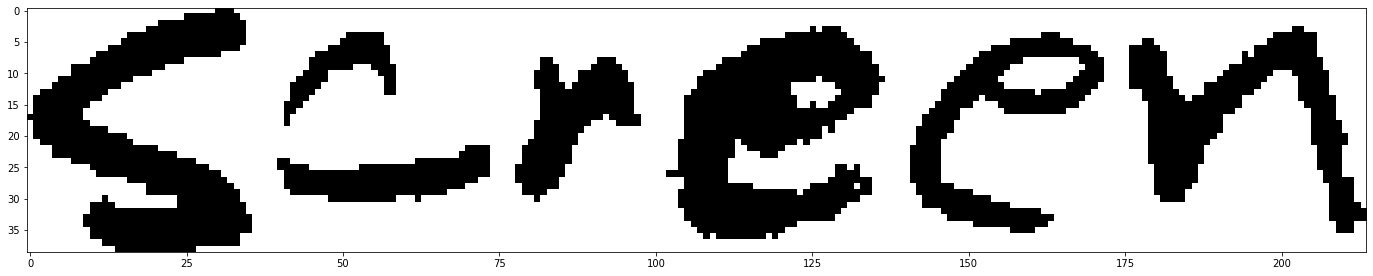

In [22]:
targetWord = randword().random_word()
targetWriter = random.randint(0,6)

if targetWriter >= 5:
        targetWriter += 1

hexArray = [hex(ord(c)).lstrip('0x') for c in targetWord]
print('Target Word:', targetWord, '\nHexcode Array:', hexArray, '\nTargeting Writer #', targetWriter)

filePathList = []

for hexcode in hexArray:
    for element in range(len(asciiCodes)):
        if asciiCodes[element][:2] == hexcode or asciiCodes[element][3:] == hexcode:
            tempCharFiles = glob(f'{rootDir}/{asciiCodes[element]}/hsf_{targetWriter}/*.png', recursive = True)
    filePathList.append(random.choice(tempCharFiles))

wordCharImages = np.array([cv.imread(path, cv.IMREAD_GRAYSCALE) for path in filePathList])

tempList = []

for element in range(len(wordCharImages)):
    tempList += [cropX(wordCharImages[element], 2)]

wordImageArray = np.hstack(tempList)
                           
print(wordImageArray.shape)


plt.imshow(crop(wordImageArray), cmap = 'gray')

In [12]:
def generateWordImage():
    #generate a random word and convert it to an array of hexcodes
    targetWord = randword().random_word()
    hexArray = [hex(ord(c)).lstrip('0x') for c in targetWord]

    #generate a target writer other than writer 5 since there are no data points for writer 5
    targetWriter = random.randint(0,6)
    if  targetWriter >= 5:
        targetWriter += 1

    #go through each hexcode in the word, for each hexcode index the files, pick a random filepath and then add it to a list
    filePathList = []

    for hexcode in hexArray:
        for element in range(len(asciiCodes)):
            if asciiCodes[element][:2] == hexcode or asciiCodes[element][3:] == hexcode:
                tempCharFiles = glob(f'{rootDir}/{asciiCodes[element]}/hsf_{targetWriter}/*.png', recursive = True)
        filePathList.append(random.choice(tempCharFiles))

    #use the chosen file paths to generate an array of images
    wordCharImages = np.array([cv.imread(path, cv.IMREAD_GRAYSCALE) for path in filePathList])

    tempList = []

    #crop each element of our array and add it to a new array
    for element in range(len(wordCharImages)):
        tempList += [cropX(wordCharImages[element], 2)]

    #merge the array of cropped words horizontally
    wordImageArray = np.hstack(tempList)
    
    finalWordImage = crop(wordImageArray)
    return finalWordImage

In [13]:
#function to create 2D array of images to combine and create a full image
def combine2DImages(imgArr):
    imgRows = []
    for i in imgArr:
        imgRows += [np.hstack(i)]
    combinedImg = np.vstack(imgRows)
    return combinedImg

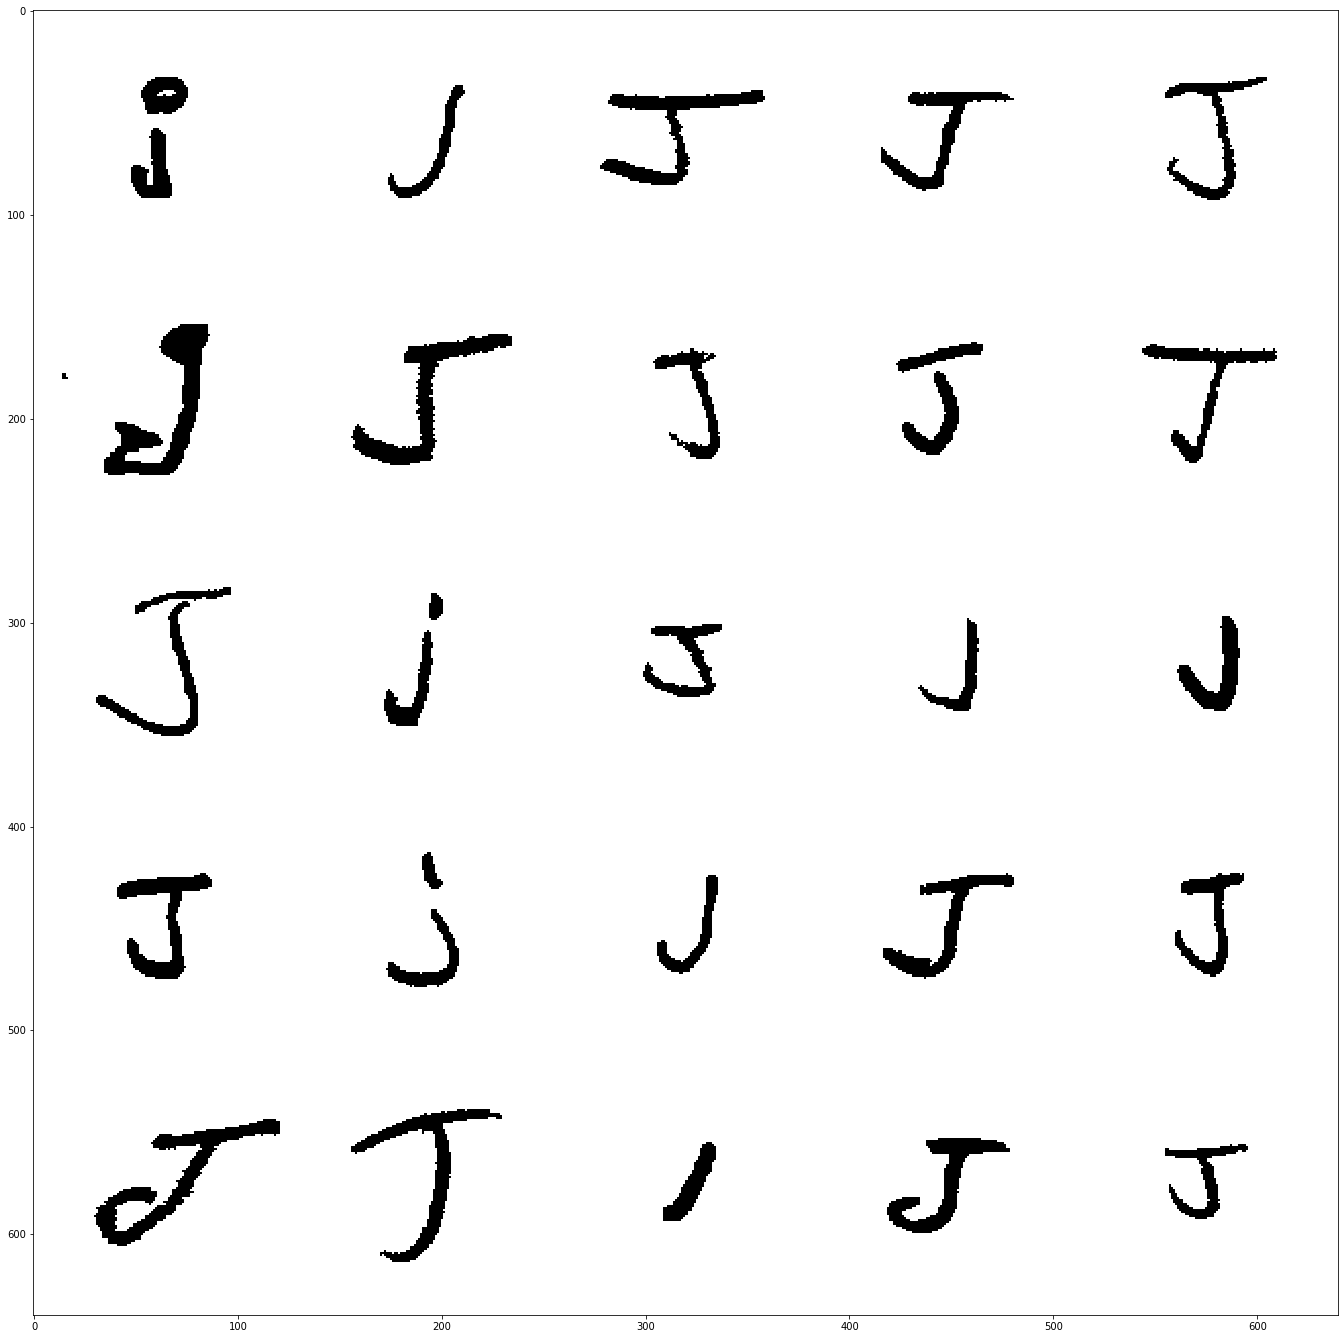

In [14]:
#NOTE: Must be a Square number (1, 4, 9, 16, 25, ...)
NUM_IMAGES = 25

IMG_GRID_SIZE = int(25**.5)
randImagePaths = random.choices(imageFiles, k = NUM_IMAGES)
randImages = np.array([cv.imread(path, cv.IMREAD_GRAYSCALE) for path in randImagePaths])
randImagesGrid = randImages.reshape((IMG_GRID_SIZE, IMG_GRID_SIZE, *randImages.shape[1:]))
combinedImg = combine2DImages(randImagesGrid)
plt.imshow(combinedImg, cmap = 'gray')

In [15]:
#function that loads all image paths into a DataFrame and sorts it by the count
def loadAllImagePaths(dir):
    charImageData = []
    allAsciiCodes = [folder[len(dir) + 1:] for folder in glob(f'{dir}/*', recursive = True)]
    indices = []
    i = 0
    for code in allAsciiCodes:
        targetChar = chr(int(code[:2], base = 16))
        imageFiles = glob(f'{dir}/{code}/**/*.png', recursive = True)
        
        indices.append(i)
        i+=1
        charImageData += [(targetChar, imageFiles, len(imageFiles))]
    
    finalDataFrame = pd.DataFrame(
        charImageData,
        columns = ['char', 'files', 'count'],
    ).sort_values(by = 'count')

    finalDataFrame.index = indices
    return finalDataFrame

In [16]:
char2files_df = loadAllImagePaths(rootDir)

In [17]:
char2files_df.head()

,char,files,count
0,f,[C:\Users\Kairos\Documents\BrailleThing\by_mer...,2961
1,G,[C:\Users\Kairos\Documents\BrailleThing\by_mer...,2964
2,Q,[C:\Users\Kairos\Documents\BrailleThing\by_mer...,3018
3,q,[C:\Users\Kairos\Documents\BrailleThing\by_mer...,3499
4,H,[C:\Users\Kairos\Documents\BrailleThing\by_mer...,3673


In [18]:
lowestChar = char2files_df.at[0, 'char']
lowestCharCount = char2files_df.at[0, 'count']
print(f'Lowest count with character \'{lowestChar} \' having {lowestCharCount} images')

highestChar = char2files_df.at[len(asciiCodes) - 1, 'char']
highestCharCount = char2files_df.at[len(asciiCodes) - 1, 'count']
print(f'Highest count with character \'{highestChar}\' having {highestCharCount} images')

Lowest count with character 'f ' having 2961 images
Highest count with character '1' having 44704 images


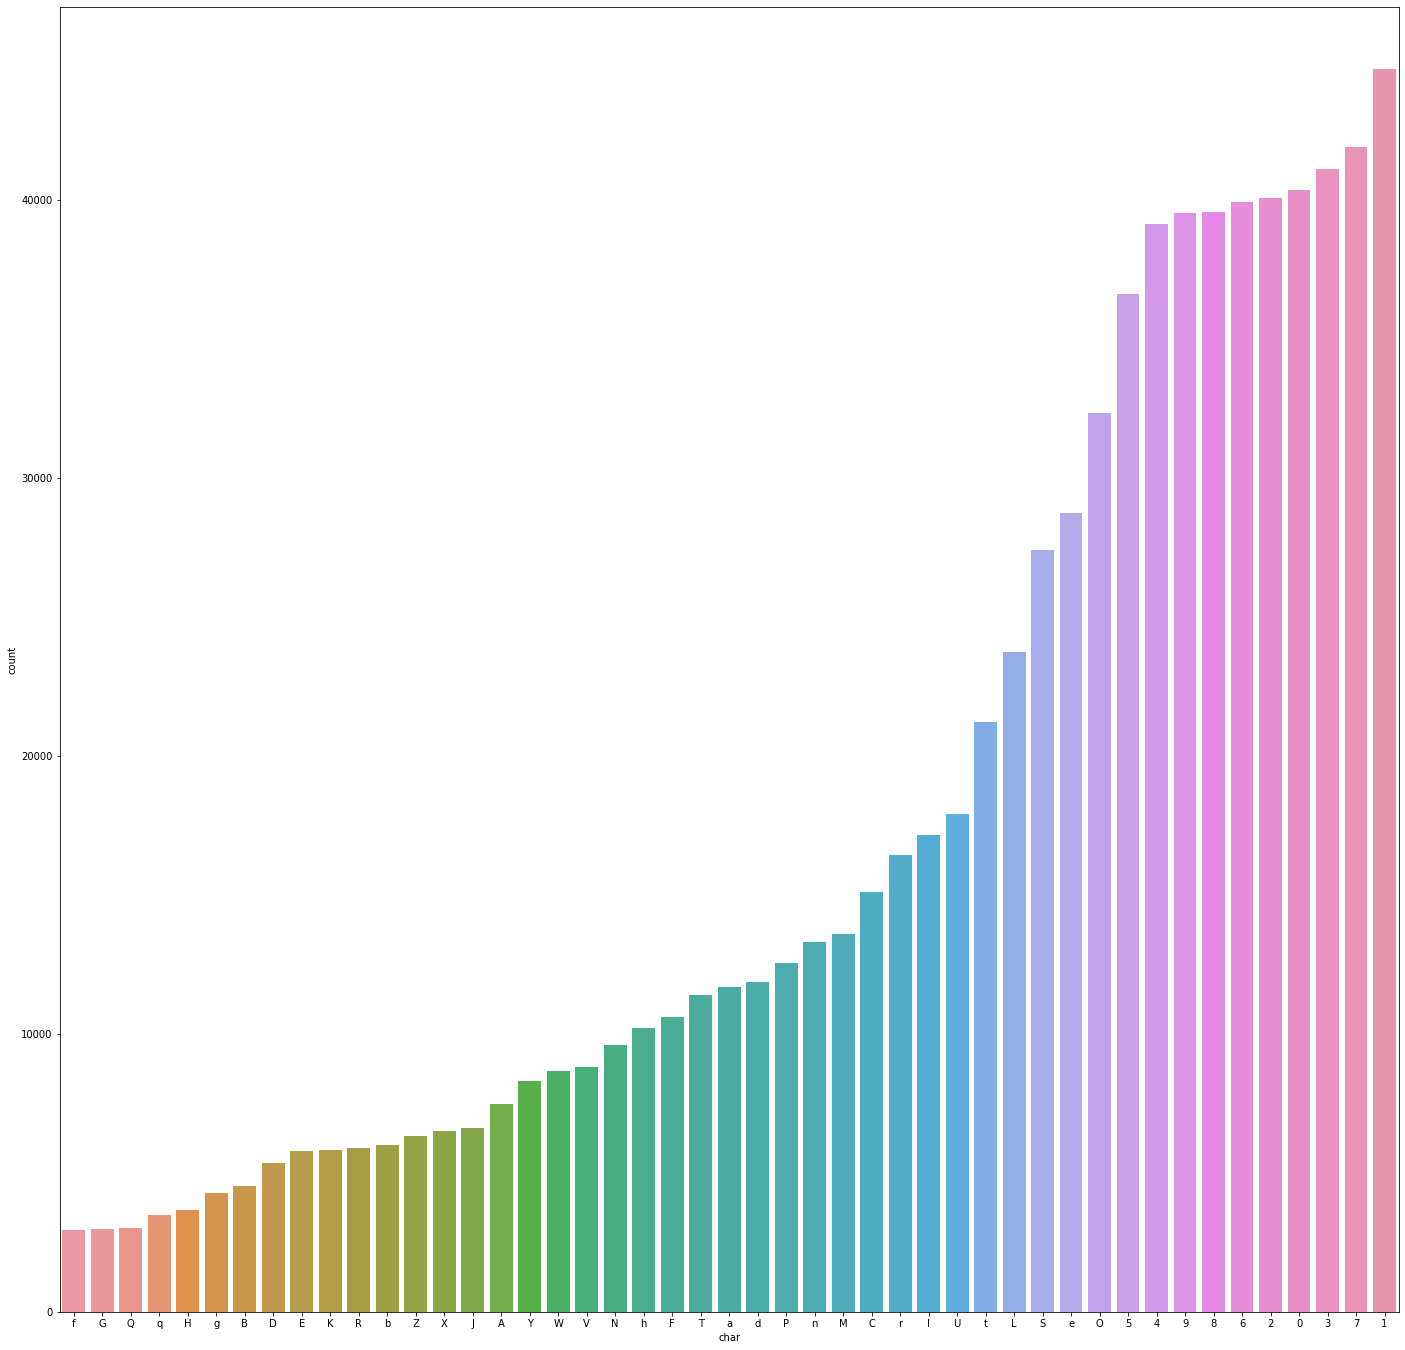

In [19]:
sns.barplot(data = char2files_df, x = 'char', y = 'count')

# Creating DataSets
Code to generate chalkboard image datasets. These datasets will later be used for YOLO training.

In [20]:
def nsCurrent():
    return int(time() * 10**7)